In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:

csv_files = [f"rates_{n}.csv" for n in range (5,16)]


f_rates = pd.DataFrame()


for num, file in enumerate(csv_files):

    df = pd.read_csv(file)
    df = df.dropna(subset="dropoff_time") # drop car agents

    fulfilled = df[df["dropoff_time"] != -1] # passengers whose requests were fulfilled
    unique_fulfilled = fulfilled.drop_duplicates(subset=['seed_int', 'iteration', 'num_drivers', 'strategy', 'AgentID', 'rate'], keep='last')
    
    unique_df = df.drop_duplicates(subset=['seed_int', 'iteration', 'num_drivers', 'strategy', 'AgentID', 'rate'], keep='last')
    
    for strategy in ["StepType.CLOSEST", "StepType.QUEUE", "StepType.WAITING"]:
        for i in range(1,6):

            num_fulfilled = len(unique_fulfilled[(unique_fulfilled["strategy"] == strategy) & (unique_fulfilled["num_drivers"] == i) & (unique_fulfilled["rate"] == num+5)])

            total = len(unique_df[(unique_df["strategy"] == strategy) & (unique_df["num_drivers"] == i) & (unique_df["rate"] == num+5)])
            print(strategy, num+5, i, num_fulfilled, total)

            f_rate = (num_fulfilled/total) * 100

            f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)


f_rates

StepType.CLOSEST 5 1 1611 7225
StepType.CLOSEST 5 2 3085 7250
StepType.CLOSEST 5 3 4302 7275
StepType.CLOSEST 5 4 5249 7300
StepType.CLOSEST 5 5 5826 7325
StepType.QUEUE 5 1 1439 7225
StepType.QUEUE 5 2 2807 7250
StepType.QUEUE 5 3 3998 7275
StepType.QUEUE 5 4 5067 7300
StepType.QUEUE 5 5 5733 7325
StepType.WAITING 5 1 1426 7225
StepType.WAITING 5 2 2863 7250
StepType.WAITING 5 3 4074 7275
StepType.WAITING 5 4 5117 7300
StepType.WAITING 5 5 5724 7325


C:\Users\lokhe\AppData\Local\Temp\ipykernel_30812\3994726893.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_30812\3994726893.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_30812\3994726893.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\

StepType.CLOSEST 6 1 1559 6025
StepType.CLOSEST 6 2 2932 6050
StepType.CLOSEST 6 3 3985 6075
StepType.CLOSEST 6 4 4704 6100
StepType.CLOSEST 6 5 5029 6125
StepType.QUEUE 6 1 1392 6025
StepType.QUEUE 6 2 2693 6050
StepType.QUEUE 6 3 3865 6075
StepType.QUEUE 6 4 4584 6100
StepType.QUEUE 6 5 5025 6125
StepType.WAITING 6 1 1444 6025
StepType.WAITING 6 2 2775 6050
StepType.WAITING 6 3 3865 6075
StepType.WAITING 6 4 4662 6100
StepType.WAITING 6 5 4996 6125


C:\Users\lokhe\AppData\Local\Temp\ipykernel_30812\3994726893.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_30812\3994726893.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_30812\3994726893.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\

StepType.CLOSEST 7 1 1469 5150
StepType.CLOSEST 7 2 2781 5175
StepType.CLOSEST 7 3 3720 5200
StepType.CLOSEST 7 4 4209 5225
StepType.CLOSEST 7 5 4363 5250
StepType.QUEUE 7 1 1379 5150
StepType.QUEUE 7 2 2669 5175
StepType.QUEUE 7 3 3653 5200
StepType.QUEUE 7 4 4190 5225
StepType.QUEUE 7 5 4315 5250
StepType.WAITING 7 1 1384 5150
StepType.WAITING 7 2 2681 5175
StepType.WAITING 7 3 3646 5200
StepType.WAITING 7 4 4217 5225
StepType.WAITING 7 5 4347 5250


C:\Users\lokhe\AppData\Local\Temp\ipykernel_30812\3994726893.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_30812\3994726893.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_30812\3994726893.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\

StepType.CLOSEST 8 1 1423 4525
StepType.CLOSEST 8 2 2635 4550
StepType.CLOSEST 8 3 3462 4575
StepType.CLOSEST 8 4 3795 4600
StepType.CLOSEST 8 5 3840 4625
StepType.QUEUE 8 1 1360 4525
StepType.QUEUE 8 2 2594 4550
StepType.QUEUE 8 3 3434 4575
StepType.QUEUE 8 4 3743 4600
StepType.QUEUE 8 5 3861 4625
StepType.WAITING 8 1 1393 4525
StepType.WAITING 8 2 2582 4550
StepType.WAITING 8 3 3416 4575
StepType.WAITING 8 4 3756 4600
StepType.WAITING 8 5 3807 4625


C:\Users\lokhe\AppData\Local\Temp\ipykernel_30812\3994726893.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_30812\3994726893.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_30812\3994726893.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\

StepType.CLOSEST 9 1 1389 4025
StepType.CLOSEST 9 2 2500 4050
StepType.CLOSEST 9 3 3178 4075
StepType.CLOSEST 9 4 3361 4100
StepType.CLOSEST 9 5 3398 4125
StepType.QUEUE 9 1 1370 4025
StepType.QUEUE 9 2 2514 4050
StepType.QUEUE 9 3 3181 4075
StepType.QUEUE 9 4 3359 4100
StepType.QUEUE 9 5 3386 4125
StepType.WAITING 9 1 1384 4025
StepType.WAITING 9 2 2527 4050
StepType.WAITING 9 3 3154 4075
StepType.WAITING 9 4 3403 4100
StepType.WAITING 9 5 3379 4125


C:\Users\lokhe\AppData\Local\Temp\ipykernel_30812\3994726893.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_30812\3994726893.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_30812\3994726893.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\

StepType.CLOSEST 10 1 1354 3625
StepType.CLOSEST 10 2 2410 3650
StepType.CLOSEST 10 3 3012 3675
StepType.CLOSEST 10 4 3056 3700
StepType.CLOSEST 10 5 3082 3725
StepType.QUEUE 10 1 1330 3625
StepType.QUEUE 10 2 2391 3650
StepType.QUEUE 10 3 2992 3675
StepType.QUEUE 10 4 3076 3700
StepType.QUEUE 10 5 3065 3725
StepType.WAITING 10 1 1283 3625
StepType.WAITING 10 2 2409 3650
StepType.WAITING 10 3 2965 3675
StepType.WAITING 10 4 3037 3700
StepType.WAITING 10 5 3039 3725


C:\Users\lokhe\AppData\Local\Temp\ipykernel_30812\3994726893.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_30812\3994726893.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_30812\3994726893.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\

StepType.CLOSEST 11 1 1318 3275
StepType.CLOSEST 11 2 2308 3300
StepType.CLOSEST 11 3 2750 3325
StepType.CLOSEST 11 4 2808 3350
StepType.CLOSEST 11 5 2806 3375
StepType.QUEUE 11 1 1280 3275
StepType.QUEUE 11 2 2295 3300
StepType.QUEUE 11 3 2730 3325
StepType.QUEUE 11 4 2766 3350
StepType.QUEUE 11 5 2799 3375
StepType.WAITING 11 1 1263 3275
StepType.WAITING 11 2 2281 3300
StepType.WAITING 11 3 2746 3325
StepType.WAITING 11 4 2812 3350
StepType.WAITING 11 5 2810 3375


C:\Users\lokhe\AppData\Local\Temp\ipykernel_30812\3994726893.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_30812\3994726893.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_30812\3994726893.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\

StepType.CLOSEST 12 1 1273 3025
StepType.CLOSEST 12 2 2205 3050
StepType.CLOSEST 12 3 2536 3075
StepType.CLOSEST 12 4 2601 3100
StepType.CLOSEST 12 5 2584 3125
StepType.QUEUE 12 1 1266 3025
StepType.QUEUE 12 2 2178 3050
StepType.QUEUE 12 3 2566 3075
StepType.QUEUE 12 4 2520 3100
StepType.QUEUE 12 5 2582 3125
StepType.WAITING 12 1 1257 3025
StepType.WAITING 12 2 2207 3050
StepType.WAITING 12 3 2542 3075
StepType.WAITING 12 4 2547 3100
StepType.WAITING 12 5 2566 3125


C:\Users\lokhe\AppData\Local\Temp\ipykernel_30812\3994726893.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_30812\3994726893.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_30812\3994726893.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\

StepType.CLOSEST 13 1 1261 2775
StepType.CLOSEST 13 2 2108 2800
StepType.CLOSEST 13 3 2371 2825
StepType.CLOSEST 13 4 2378 2850
StepType.CLOSEST 13 5 2404 2875
StepType.QUEUE 13 1 1230 2775
StepType.QUEUE 13 2 2083 2800
StepType.QUEUE 13 3 2322 2825
StepType.QUEUE 13 4 2362 2850
StepType.QUEUE 13 5 2390 2875
StepType.WAITING 13 1 1220 2775


C:\Users\lokhe\AppData\Local\Temp\ipykernel_30812\3994726893.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_30812\3994726893.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_30812\3994726893.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\

StepType.WAITING 13 2 2127 2800
StepType.WAITING 13 3 2344 2825
StepType.WAITING 13 4 2350 2850
StepType.WAITING 13 5 2352 2875


C:\Users\lokhe\AppData\Local\Temp\ipykernel_30812\3994726893.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_30812\3994726893.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_30812\3994726893.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\

StepType.CLOSEST 14 1 1229 2575
StepType.CLOSEST 14 2 1992 2600
StepType.CLOSEST 14 3 2184 2625
StepType.CLOSEST 14 4 2234 2650
StepType.CLOSEST 14 5 2242 2675
StepType.QUEUE 14 1 1209 2575
StepType.QUEUE 14 2 2001 2600
StepType.QUEUE 14 3 2211 2625
StepType.QUEUE 14 4 2180 2650
StepType.QUEUE 14 5 2241 2675
StepType.WAITING 14 1 1204 2575
StepType.WAITING 14 2 2040 2600
StepType.WAITING 14 3 2220 2625


C:\Users\lokhe\AppData\Local\Temp\ipykernel_30812\3994726893.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_30812\3994726893.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_30812\3994726893.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\

StepType.WAITING 14 4 2199 2650
StepType.WAITING 14 5 2260 2675


C:\Users\lokhe\AppData\Local\Temp\ipykernel_30812\3994726893.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_30812\3994726893.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)


StepType.CLOSEST 15 1 1205 2425
StepType.CLOSEST 15 2 1925 2450
StepType.CLOSEST 15 3 2043 2475
StepType.CLOSEST 15 4 2062 2500
StepType.CLOSEST 15 5 2073 2525
StepType.QUEUE 15 1 1187 2425
StepType.QUEUE 15 2 1927 2450
StepType.QUEUE 15 3 2017 2475
StepType.QUEUE 15 4 2045 2500
StepType.QUEUE 15 5 2104 2525
StepType.WAITING 15 1 1204 2425
StepType.WAITING 15 2 1915 2450
StepType.WAITING 15 3 2054 2475


C:\Users\lokhe\AppData\Local\Temp\ipykernel_30812\3994726893.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_30812\3994726893.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_30812\3994726893.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\

StepType.WAITING 15 4 2059 2500
StepType.WAITING 15 5 2098 2525


C:\Users\lokhe\AppData\Local\Temp\ipykernel_30812\3994726893.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)
C:\Users\lokhe\AppData\Local\Temp\ipykernel_30812\3994726893.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  f_rates = f_rates.append({'Strategy': strategy, 'num_drivers': i, 'f_rate': f_rate, 'rate': num+5}, ignore_index=True)


,Strategy,num_drivers,f_rate,rate
0,StepType.CLOSEST,1,22.297578,5
1,StepType.CLOSEST,2,42.551724,5
2,StepType.CLOSEST,3,59.134021,5
3,StepType.CLOSEST,4,71.904110,5
4,StepType.CLOSEST,5,79.535836,5
...,...,...,...,...
160,StepType.WAITING,1,49.649485,15
161,StepType.WAITING,2,78.163265,15
162,StepType.WAITING,3,82.989899,15
163,StepType.WAITING,4,82.360000,15


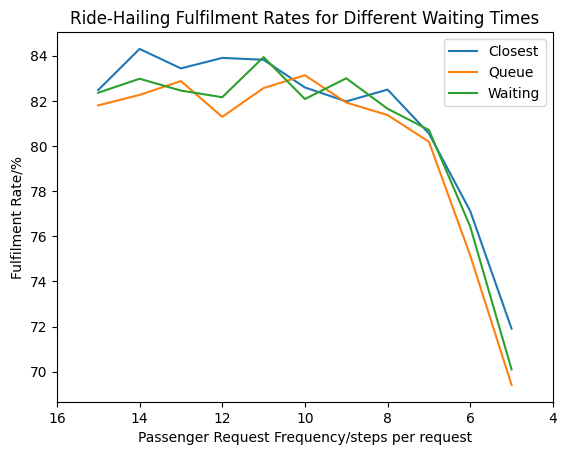

In [63]:
f_rates

n = 4
n_f_rates = f_rates[f_rates["num_drivers"] == n]

groups = n_f_rates.groupby('Strategy')
window = 3
# plot a line for each group
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group['rate'], group['f_rate'], label=name)
    ax.set_xlim(max(group['rate']+1), min(group['rate']-1))

    # smooth_line = group['f_rate'].rolling(window=window).mean()
    # ax.plot(group['rate'], smooth_line, label=name)
    



ax.set_xlabel('Passenger Request Frequency/steps per request')
ax.set_ylabel('Fulfilment Rate/%')
ax.set_title('Ride-Hailing Fulfilment Rates for Different Waiting Times')
# plt.xticks([15, 25, 35,45], ['10-19', '20-29', '30-39', '40-49'])

plt.legend(['Closest', 'Queue', 'Waiting'])
plt.savefig(f"figures/hailing_frate_waiting_{n}car")